In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement

station = Base.classes.station

In [20]:
# Create our session (link) from Python to the DB
session = Session(engine)
conn = engine.connect()

# Exploratory Precipitation Analysis

In [10]:
first_row = session.query(measurement).first()
#prints object in the form of a dictionary
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fce98facc10>,
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0,
 'station': 'USC00519397',
 'prcp': 0.08}

In [13]:
# Find the most recent date in the data set.
latest_date = session.query(measurement.date).order_by(measurement.date.desc()).first()

latest_date

('2017-08-23',)

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.

dateback = dt.date(2017, 8,23) - dt.timedelta(days=365)

dateback

datetime.date(2016, 8, 23)

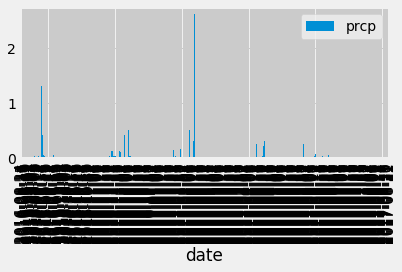

In [55]:
# Perform a query to retrieve the data and precipitation scores
last_12 = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date < '2017-08-23').\
    filter(measurement.date > '2016-08-23').\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

last_df = pd.DataFrame(last_12, columns=['date', 'prcp'])
last_df

#df.set_index('date', inplace=True)
df.plot.bar()
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [56]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_df
#last_df.describe()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2214,2017-08-21,NaN
2215,2017-08-21,0.56
2216,2017-08-22,0.00
2217,2017-08-22,0.00


# Exploratory Station Analysis

In [59]:
first_row_too = session.query(station).first()
#prints object in the form of a dictionary
first_row_too.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fce58a2a690>,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'longitude': -157.8168,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US',
 'elevation': 3.0}

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()